#### Trabalho de Tecnologias Para Desenvolvimento de Sistemas
#### AP04 – Análise de Dados usando Python e Jupyter
#### Aluno: Matheus Bueno Pereira
#### Base de dados utilizada: https://dados.gov.br/dados/conjuntos-dados/inss-comunicacao-de-acidente-de-trabalho-cat1 janeiro de 2021
#### Para a relização deste trabalho foi utilizado o ambiente do jupyter notebook no VSCODE! Para isso, foi baixado a extensão do Jupyter e Python 3.12.3

In [ ]:
# Vamos importar as bibliotecas requisitadas para a relização do trabalho:
# Instalar Seaborn no Jupyter Notebook
%pip install seaborn
import pandas as pd # type: ignore
import matplotlib.pyplot as plt # type: ignore
import numpy as np # type: ignore
import seaborn as sns # type: ignore

#### Agora, vamos carregar a nossa base de dados utilizando uma função da biblioteca Pandas!
#### Se ocorrer algum erro ao carregar o arquivo, verifique se ele está no mesmo diretório do arquivo ipynb.

In [2]:
try:
  df = pd.read_csv('dados.csv', sep=';', encoding='ISO-8859-1')
  print("Arquivo CSV carregado com sucesso.")
except Exception as e:
  print("Erro ao carregar CSV:", e)

Arquivo CSV carregado com sucesso.


#### Como o arquivo coletou dados em janeiro de 2021 a março de 2021, vamos filtrar a tabela para coletar os dados apenas do mês de janeiro!

In [3]:
df = df[df['Data Acidente'].str.contains("2021/01")] 

#### Para darmos início a nossa base dados, seria interessante ver em primeiro lugar quais foram os tipos de acidentes que aconteceram:

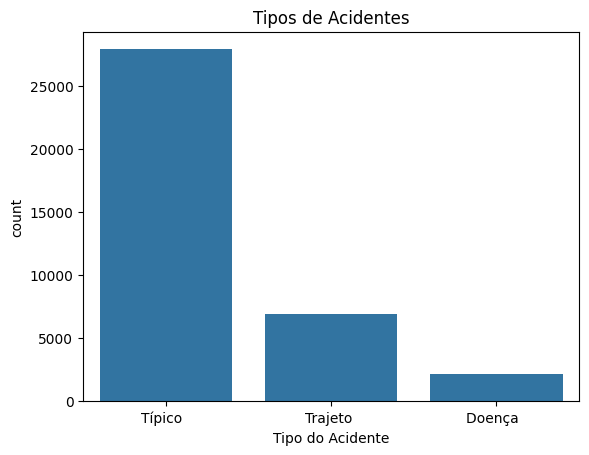

In [4]:
#Utilizar a biblioteca pandas para fazer a contagem do número de acidentes pelo tipo de acidente.
tipoAcidente = df['Tipo do Acidente'].value_counts()
sns.barplot(tipoAcidente)
plt.title('Tipos de Acidentes')
plt.show()

## Gráfico com analise por tipo de acidente ocorrido
Observando o gráfico de barras podemos notar que a grande parte dos acidentes foi do tipo 'acidente típico'. Este acidente refere-se a acidentes que aconteceram dentro do ambiente de trabalho.
Teve também uma parcela significativa do tipo 'Trajeto' que refere-se a acidentes ocorridos durante ou após o deslocamento para o trabalho ou para casa.
Também há uma pequena parcela do tipo de acidente por 'Doença', na qual refere-se a acidente por doença ocupacional causada pelo ambiente de trabalho. Este acidente pode ser decorrentes de exposições prolongadas a agentes químicos, físicos ou biológicos, resultando em uma variedade de doenças

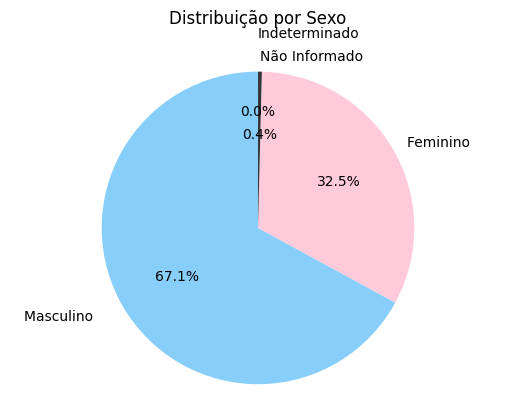

In [5]:
df = pd.read_csv('dados.csv', sep=';', encoding='ISO-8859-1')

#Contar a distribuição por sexo
sexo_counts = df['Sexo'].value_counts()

#Criar um vetor de explosão
#Vamos usar pequenos valores para criar uma separação sutil entre as fatias para o tipo 'indeterminado' não sobrepor o 'Não informado'
explode = [0, 0, 0, 0.15]

#Criar o gráfico de pizza com explode
plt.pie(sexo_counts, labels=sexo_counts.index, autopct='%1.1f%%', startangle=90, colors=['#87cefa','#ffcbdb','#363636', '#70DBDB'], explode=explode)
plt.axis('equal')  # Para manter o formato circular
plt.title("Distribuição por Sexo")
plt.show()


## Gráfico com análise do sexo que mais teve índice de acidentes
Observando este gráfico de pizza, podemos ver que a grande maioria dos casos de acidentes são do sexo masculino com 66,7% dos acidentes e ocupando 2/3 do gráfico.
Em seguida temos o sexo Feminino ocupando 32,9% e fatia de 1/3 do nosso gráfico.
Enquanto os demais tipos de Sexo ocupam apenas 0,4% da fatia do gráfico.

De acordo a prefeitura de Juiz de Fora, o sexo Masculino tem a maior parte dos casos por exercerem funções mais arriscadas e estarem em ambientes mais propícios a acidentes.
Fonte: https://www.pjf.mg.gov.br/noticias/view.php?modo=link2&idnoticia2=30398

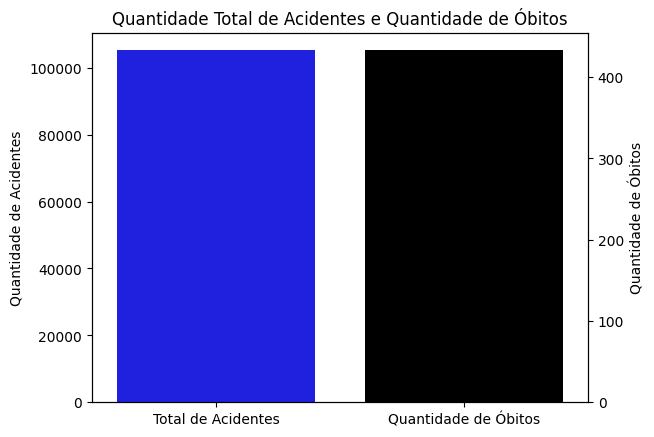

Total de acidentes: 105240 
Óbitos: 433


In [6]:
#Criar DataFrame
df = pd.DataFrame(df)

#Contar a quantidade de óbitos
quantidade_óbito = df['Indica Óbito Acidente'].value_counts().get('Sim', 0)

#Total de acidentes conhecidos
total_acidentes = 105240

#Criar um gráfico para a quantidade total de acidentes
fig, ax1 = plt.subplots()

#Adicionar uma barra para o total de acidentes
sns.barplot(x=['Total de Acidentes'], y=[total_acidentes], ax=ax1, color='blue')

#Criar um eixo secundário para a quantidade de óbitos
ax2 = ax1.twinx()

#Adicionar uma barra para a quantidade de óbitos
sns.barplot(x=['Quantidade de Óbitos'], y=[quantidade_óbito], ax=ax2, color='black')

#Configurar títulos e rótulos
ax1.set_ylabel('Quantidade de Acidentes')
ax2.set_ylabel('Quantidade de Óbitos')

#Título do gráfico
plt.title("Quantidade Total de Acidentes e Quantidade de Óbitos")
plt.show()

print("Total de acidentes:", total_acidentes, "\nÓbitos:", quantidade_óbito)

## Gráfico de barras duplas exibindo o total de acidentes e a quantidade de óbitos

In [7]:
#Base de dados
df = pd.DataFrame(df)
df

,Agente Causador Acidente,Data Acidente,CBO,CID-10,CNAE2.0 Empregador,CNAE2.0 Empregador.1,Emitente CAT,Espécie do benefício,Filiação Segurado,Indica Óbito Acidente,...,Sexo,Tipo do Acidente,UF Munic. Acidente,UF Munic. Empregador,Data Acidente.1,Data Despacho Benefício,Data Acidente.2,Data Nascimento,Data Emissão CAT,CNPJ/CEI Empregador
0,Veiculo Rodoviario Motorizado,2021/01,514205-Coletor Lixo,S81.9 Ferim da Perna Parte Ne,3811,Coleta de Residuos Nao-Perigosos,Empregador,Pa,Empregado,Não,...,Masculino,Típico,{ñ class},Mato Grosso do Sul,2021/01,0000/00,02/01/2021,01/09/1996,04/01/2021,17.064.901.000.140
1,"Vegetal - Planta, Arvore, em Estado Natural,",2021/01,622720-Trab. Cultura de Dendê,W60.7 Fazenda,139,Cultivo de Plantas de Lavoura Permanente nao,Empregador,Pa,Empregado,Não,...,Masculino,Típico,Acre,Pará,2021/01,0000/00,02/01/2021,22/01/1985,04/01/2021,08.581.205.000.381
2,Prensa - Maquina,2021/01,"919205-Mec. Manut. Máq. Cortadoras Grama, Roç",G56.9 Mononeuropatia dos Membros Super Ne,2599,Fabricacao de Produtos de Metal nao Especific,Empregador,Pa,Empregado,Não,...,Masculino,Típico,Tocantins,Rio de Janeiro,2021/01,0000/00,03/01/2021,29/04/1980,04/01/2021,10.277.146.000.132
3,"Aprision. Em, Sobre ou Entre Objeto Para",2021/01,513435-Atendente Lanchonete,S61.1 Ferim de Dedos c/Lesao da Unha,4721,"Comercio Varejista de Produtos de Padaria, La",Empregador,Pa,Empregado,Não,...,Masculino,Típico,Maranhão,São Paulo,2021/01,0000/00,02/01/2021,19/01/1998,04/01/2021,23.532.598.000.165
4,Esforco Excessivo ao Erguer Objeto,2021/01,514225-Trab. de Serv. de Manut. de Edifícios,S59.8 Outr Traum Espec do Antebraco,9430,Atividades de Associacoes de Defesa de Direit,Empregador,Pa,Empregado,Não,...,Feminino,Típico,{ñ class},Santa Catarina,2021/01,0000/00,01/01/2021,12/06/1979,04/01/2021,28.700.530.000.676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105235,Produto Mineral nao Metalico - Produto de Min,2021/03,715210-Pedreiro,S42.3 Frat da Diafise do Umero,4120,Construcao de Edificios,Empregador,Pa,Empregado,Não,...,Masculino,Típico,Maranhão,São Paulo,2021/03,0000/00,11/03/2021,06/05/1970,11/03/2021,27.468.189.000.106
105236,Animal Vivo,2021/03,623110-Trab. Pecuária (Bovinos Corte),S36.0 Traum do Baco,141,Producao de Sementes Certificadas,Empregador,Pa,Empregado,Não,...,Masculino,Típico,Pernambuco,Rondônia,2021/03,0000/00,26/03/2021,01/12/1981,26/03/2021,00.370.400.055.087
105237,"Corrente, Corda, Cabo - Dispositivo de Transm",2021/02,"911305-Mec. Manut. Máquinas, em Geral",S43.0 Luxacao da Articulacao do Ombro,2330,"Fabricacao de Artefatos de Concreto, Cimento,",Empregador,Auxílio Doenca por Acidente do Trabalho,Empregado,Não,...,Masculino,Típico,{ñ class},Rio Grande do Sul,2021/02,2021/03,16/02/2021,00/00/0000,03/03/2021,00.149.209.000.111
105238,Chao - Superficie Utilizada para Sustentar Pe,2021/03,413115-Auxiliar Faturamento,S92.9 Frat do Pe Ne,8610,Atividades de Atendimento Hospitalar,Empregador,Auxílio Doenca por Acidente do Trabalho,Empregado,Não,...,Feminino,Típico,Maranhão,São Paulo,2021/03,2021/03,03/03/2021,14/09/1986,03/03/2021,51.427.540.000.359
